# netid = pthiagu2


In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from scipy import stats
from scipy.stats import norm 
from scipy.stats.kde import gaussian_kde
import scipy.stats as stats

import seaborn as sns
# %matplotlib notebook
sns.set_style('whitegrid')

In [2]:
#Importing the datasets:
baseline = pd.read_csv("498DS_BaselineData.csv")
metformin = pd.read_csv("498DS_MetforminData.csv")

In [3]:
baseline.head()


,Chr,GeneID,StartCoding,Stop,CodingLength,s_62_M2_N701_S502_RPKM,s_62_M2_N701_S503_RPKM,s_62_M2_N701_S504_RPKM,s_62_M2_N701_S505_RPKM,s_62_M2_N701_S506_RPKM,...,s_85_M2_N711_S501_RPKM,s_85_M2_N711_S502_RPKM,s_85_M2_N711_S503_RPKM,s_85_M2_N711_S504_RPKM,s_85_M2_N711_S506_RPKM,s_85_M2_N711_S507_RPKM,s_85_M2_N711_S508_RPKM,s_85_M2_N712_S503_RPKM,s_85_M2_N712_S504_RPKM,s_85_M2_N712_S505_RPKM
0,chr1,AKR1A1,46016455,46035723,1580,0.000000,0.000000,14.531662,14.268424,26.459120,...,0.000000,0.0,1.037722,24.391142,17.188837,0.000000,2.173159,48.894683,9.213393,0.000000
1,chr1,ANP32E,150190717,150208504,3553,263.583489,0.000000,871.851991,439.864123,575.552858,...,526.275026,0.0,454.455263,587.120601,469.683190,565.316349,343.552412,236.214451,838.993154,141.792692
2,chr1,ARF1,228270361,228286913,2198,41.926167,486.847569,110.116896,156.263029,51.559562,...,148.414035,0.0,36.850006,106.643195,78.107210,40.569316,104.663612,92.728846,80.468384,32.867866
3,chr1,ARPC5,183595332,183604985,1982,63.349868,0.000000,139.493933,170.281826,184.750299,...,30.830665,0.0,184.144951,65.880840,60.437829,70.357630,150.501134,94.707269,144.506633,58.816776
4,chr1,ATP5F1,111991743,112004525,2101,327.593082,0.000000,221.522538,311.490830,207.609025,...,221.936539,0.0,175.275819,141.346657,177.968802,189.485482,113.785720,198.088156,76.215503,37.511264


In [4]:
baseline2 = baseline.copy()
baseline2.head(923)

,Chr,GeneID,StartCoding,Stop,CodingLength,s_62_M2_N701_S502_RPKM,s_62_M2_N701_S503_RPKM,s_62_M2_N701_S504_RPKM,s_62_M2_N701_S505_RPKM,s_62_M2_N701_S506_RPKM,...,s_85_M2_N711_S501_RPKM,s_85_M2_N711_S502_RPKM,s_85_M2_N711_S503_RPKM,s_85_M2_N711_S504_RPKM,s_85_M2_N711_S506_RPKM,s_85_M2_N711_S507_RPKM,s_85_M2_N711_S508_RPKM,s_85_M2_N712_S503_RPKM,s_85_M2_N712_S504_RPKM,s_85_M2_N712_S505_RPKM
0,chr1,AKR1A1,46016455,46035723,1580,0.000000,0.000000,14.531662,14.268424,26.459120,...,0.000000,0.000000,1.037722,24.391142,17.188837,0.000000,2.173159,48.894683,9.213393,0.000000
1,chr1,ANP32E,150190717,150208504,3553,263.583489,0.000000,871.851991,439.864123,575.552858,...,526.275026,0.000000,454.455263,587.120601,469.683190,565.316349,343.552412,236.214451,838.993154,141.792692
2,chr1,ARF1,228270361,228286913,2198,41.926167,486.847569,110.116896,156.263029,51.559562,...,148.414035,0.000000,36.850006,106.643195,78.107210,40.569316,104.663612,92.728846,80.468384,32.867866
3,chr1,ARPC5,183595332,183604985,1982,63.349868,0.000000,139.493933,170.281826,184.750299,...,30.830665,0.000000,184.144951,65.880840,60.437829,70.357630,150.501134,94.707269,144.506633,58.816776
4,chr1,ATP5F1,111991743,112004525,2101,327.593082,0.000000,221.522538,311.490830,207.609025,...,221.936539,0.000000,175.275819,141.346657,177.968802,189.485482,113.785720,198.088156,76.215503,37.511264
5,chr1,ATP6V0B,44440602,44443972,1022,196.119699,0.000000,156.792413,158.953229,249.868467,...,147.637719,0.000000,206.955570,86.951178,132.868700,119.739195,173.863358,155.362818,118.223520,61.049093
6,chr1,ATPIF1,28562602,28564616,1925,175.032220,0.000000,78.769785,138.123573,127.947709,...,93.277268,786.495866,123.332102,92.797394,76.335657,118.106669,68.225906,161.210051,82.616616,78.327837
7,chr1,C1orf122,38273473,38275126,1318,6.991936,0.000000,1.451696,10.061639,0.000000,...,14.978802,0.000000,0.000000,6.191949,0.735919,1.199585,3.582085,7.732094,2.208977,3.322002
8,chr1,C1orf123,53679772,53686289,1084,72.792084,0.000000,9.707883,21.408830,41.818420,...,10.406990,0.000000,54.754220,95.780366,18.342990,6.125849,21.776698,29.719921,75.874502,5.806224
9,chr1,C1orf133,210404804,210407466,800,25.918233,1337.613697,0.000000,3.315310,0.000000,...,30.553189,0.000000,0.000000,0.566735,0.000000,1.581052,3.218992,11.094932,7.278581,0.000000


In [5]:
baseline4 = baseline.copy()


In [6]:
print(baseline)

       Chr     GeneID  StartCoding       Stop  CodingLength  \
0     chr1     AKR1A1     46016455   46035723          1580   
1     chr1     ANP32E    150190717  150208504          3553   
2     chr1       ARF1    228270361  228286913          2198   
3     chr1      ARPC5    183595332  183604985          1982   
4     chr1     ATP5F1    111991743  112004525          2101   
5     chr1    ATP6V0B     44440602   44443972          1022   
6     chr1     ATPIF1     28562602   28564616          1925   
7     chr1   C1orf122     38273473   38275126          1318   
8     chr1   C1orf123     53679772   53686289          1084   
9     chr1   C1orf133    210404804  210407466           800   
10    chr1   C1orf159      1017198    1051736          2104   
11    chr1    C1orf31    234509214  234519795           856   
12    chr1    C1orf35    228288428  228291022          1290   
13    chr1      C4BPB    207262212  207273337          1195   
14    chr1     CACYBP    174968571  174981163          

In [7]:



metformin.head()

,Chr,GeneID,Start,Stop,CodingLength,s_63_M2_N701_S501_RPKM,s_63_M2_N701_S502_RPKM,s_63_M2_N701_S503_RPKM,s_63_M2_N701_S504_RPKM,s_63_M2_N701_S505_RPKM,...,s_204_M2_N712_S501_RPKM,s_204_M2_N712_S502_RPKM,s_204_M2_N712_S503_RPKM,s_204_M2_N712_S504_RPKM,s_204_M2_N712_S505_RPKM,s_204_M2_N712_S506_RPKM,s_204_M2_N712_S507_RPKM,s_204_M2_N712_S508_RPKM,s_lane1_Undetermined_RPKM.1,s_lane2_Undetermined_RPKM.1
0,chr1,ANKRD36BP1,168214819,168216668,1850,0.440043,0.000000,12.693285,27.412660,7.378925,...,0.141431,4.867474,0.000000,2.293990,0.000000,2.508867,1.699676,10.164217,6.560453,4.703404
1,chr1,ANP32E,150190717,150208504,3553,517.592029,10.749289,754.147392,534.208422,356.355539,...,1533.653888,586.403579,571.360726,1441.236773,793.018158,439.711955,504.272351,634.004705,622.270556,633.534112
2,chr1,APOA1BP,156561558,156564091,1121,79.882864,0.608389,1.102520,5.517006,6.088765,...,44.580451,65.266924,0.000000,9.043854,13.633060,0.414041,38.147951,96.536841,47.216858,48.830575
3,chr1,ARF1,228270361,228286913,2198,231.482884,70.434447,73.379540,139.279295,166.755975,...,319.976644,99.860175,0.000000,86.242051,50.008005,134.934356,19.741917,156.957326,148.013958,152.447260
4,chr1,ARPC5,183595332,183604985,1982,162.240771,59.185012,164.311943,123.878491,244.505991,...,205.146479,135.163275,0.000000,135.491107,155.697364,77.512851,121.841571,151.602966,132.166204,136.973007


In [8]:
metformin2 = metformin.copy(deep = True)
metformin4 = metformin.copy()
metformin4.head()

,Chr,GeneID,Start,Stop,CodingLength,s_63_M2_N701_S501_RPKM,s_63_M2_N701_S502_RPKM,s_63_M2_N701_S503_RPKM,s_63_M2_N701_S504_RPKM,s_63_M2_N701_S505_RPKM,...,s_204_M2_N712_S501_RPKM,s_204_M2_N712_S502_RPKM,s_204_M2_N712_S503_RPKM,s_204_M2_N712_S504_RPKM,s_204_M2_N712_S505_RPKM,s_204_M2_N712_S506_RPKM,s_204_M2_N712_S507_RPKM,s_204_M2_N712_S508_RPKM,s_lane1_Undetermined_RPKM.1,s_lane2_Undetermined_RPKM.1
0,chr1,ANKRD36BP1,168214819,168216668,1850,0.440043,0.000000,12.693285,27.412660,7.378925,...,0.141431,4.867474,0.000000,2.293990,0.000000,2.508867,1.699676,10.164217,6.560453,4.703404
1,chr1,ANP32E,150190717,150208504,3553,517.592029,10.749289,754.147392,534.208422,356.355539,...,1533.653888,586.403579,571.360726,1441.236773,793.018158,439.711955,504.272351,634.004705,622.270556,633.534112
2,chr1,APOA1BP,156561558,156564091,1121,79.882864,0.608389,1.102520,5.517006,6.088765,...,44.580451,65.266924,0.000000,9.043854,13.633060,0.414041,38.147951,96.536841,47.216858,48.830575
3,chr1,ARF1,228270361,228286913,2198,231.482884,70.434447,73.379540,139.279295,166.755975,...,319.976644,99.860175,0.000000,86.242051,50.008005,134.934356,19.741917,156.957326,148.013958,152.447260
4,chr1,ARPC5,183595332,183604985,1982,162.240771,59.185012,164.311943,123.878491,244.505991,...,205.146479,135.163275,0.000000,135.491107,155.697364,77.512851,121.841571,151.602966,132.166204,136.973007


# Task 1

# Part1

In [9]:
#Gene Samples:
print('No of Gene Samples in baseline',len(baseline['GeneID']))
print('No of Gene Samples in metformin',len(metformin['GeneID']))
#Cells
print('No of cells in baseline: 174 - 5 = 169')
print('No of cells in metformin: 182 - 5 = 177')
#Genes common in both datasets:
Merged_dataset = pd.merge(baseline,metformin,how = 'inner',on = ['GeneID'])
print('Common Genes',len(Merged_dataset['GeneID']))

No of Gene Samples in baseline 1170
No of Gene Samples in metformin 1170
No of cells in baseline: 174 - 5 = 169
No of cells in metformin: 182 - 5 = 177
Common Genes 833


In [10]:
baseline.columns.get_loc("s_62_M2_N702_S508_RPKM")

19

In [11]:
baseline.columns.get_loc("s_62_M2_N706_S503_RPKM")

44

In [12]:

baseline.columns.get_loc("s_62_M2_N711_S503_RPKM")

80

In [13]:
metformin.columns.get_loc("s_204_M2_N704_S502_RPKM")

114

In [14]:
metformin.columns.get_loc("s_63_M2_N702_S505_RPKM")

15

In [15]:
metformin.columns.get_loc("s_63_M2_N704_S504_RPKM")

27

In [16]:
baseline_modified = baseline[baseline['GeneID'] == 'SDHD'].iloc[:,[0,1,2,3,4,19,44,80]]
baseline_modified.head()

,Chr,GeneID,StartCoding,Stop,CodingLength,s_62_M2_N702_S508_RPKM,s_62_M2_N706_S503_RPKM,s_62_M2_N711_S503_RPKM
670,chr11,SDHD,111957571,111966518,1365,322.209694,215.131247,0.0


In [17]:
metformin_modified = metformin[metformin['GeneID'] == 'SDHD'].iloc[:,[0,1,2,3,4,114,15,27]]
metformin_modified.head()

,Chr,GeneID,Start,Stop,CodingLength,s_204_M2_N704_S502_RPKM,s_63_M2_N702_S505_RPKM,s_63_M2_N704_S504_RPKM
691,chr11,SDHD,111957571,111966518,1365,258.479848,388.538284,149.042668


#Part 2

In [18]:
baseline2['Log s_62_M2_N702_S508_RPKM'] = np.log(baseline2['s_62_M2_N702_S508_RPKM'])
baseline2['Log s_62_M2_N706_S503_RPKM'] = np.log(baseline2['s_62_M2_N706_S503_RPKM'])
baseline2['Log s_62_M2_N711_S503_RPKM'] = np.log(baseline2['s_62_M2_N711_S503_RPKM'])
metformin2['Log s_204_M2_N704_S502_RPKM'] = np.log(metformin2['s_204_M2_N704_S502_RPKM'])
metformin2['Log s_63_M2_N702_S505_RPKM'] = np.log(metformin2['s_63_M2_N702_S505_RPKM'])
metformin2['Log s_63_M2_N704_S504_RPKM'] = np.log(metformin2['s_63_M2_N704_S504_RPKM'])
metformin2.head()

/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero enco

,Chr,GeneID,Start,Stop,CodingLength,s_63_M2_N701_S501_RPKM,s_63_M2_N701_S502_RPKM,s_63_M2_N701_S503_RPKM,s_63_M2_N701_S504_RPKM,s_63_M2_N701_S505_RPKM,...,s_204_M2_N712_S504_RPKM,s_204_M2_N712_S505_RPKM,s_204_M2_N712_S506_RPKM,s_204_M2_N712_S507_RPKM,s_204_M2_N712_S508_RPKM,s_lane1_Undetermined_RPKM.1,s_lane2_Undetermined_RPKM.1,Log s_204_M2_N704_S502_RPKM,Log s_63_M2_N702_S505_RPKM,Log s_63_M2_N704_S504_RPKM
0,chr1,ANKRD36BP1,168214819,168216668,1850,0.440043,0.000000,12.693285,27.412660,7.378925,...,2.293990,0.000000,2.508867,1.699676,10.164217,6.560453,4.703404,0.613633,1.653050,1.849835
1,chr1,ANP32E,150190717,150208504,3553,517.592029,10.749289,754.147392,534.208422,356.355539,...,1441.236773,793.018158,439.711955,504.272351,634.004705,622.270556,633.534112,6.056006,5.263123,6.310279
2,chr1,APOA1BP,156561558,156564091,1121,79.882864,0.608389,1.102520,5.517006,6.088765,...,9.043854,13.633060,0.414041,38.147951,96.536841,47.216858,48.830575,1.114598,2.036231,4.050186
3,chr1,ARF1,228270361,228286913,2198,231.482884,70.434447,73.379540,139.279295,166.755975,...,86.242051,50.008005,134.934356,19.741917,156.957326,148.013958,152.447260,4.193712,5.107987,4.401087
4,chr1,ARPC5,183595332,183604985,1982,162.240771,59.185012,164.311943,123.878491,244.505991,...,135.491107,155.697364,77.512851,121.841571,151.602966,132.166204,136.973007,4.877089,4.697644,4.016605


In [19]:
List1 = np.log(baseline2['s_62_M2_N702_S508_RPKM']).tolist()
List11 = [x for x in List1 if x != -np.inf]
List2 = np.log(baseline2['s_62_M2_N706_S503_RPKM']).tolist()
List22 = [x for x in List2 if x != -np.inf]
List3 = np.log(baseline2['s_62_M2_N711_S503_RPKM']).tolist()
List33 = [x for x in List3 if x != -np.inf]
List11.extend(List22)
List11.extend(List33)
List4 = np.log(metformin2['s_204_M2_N704_S502_RPKM']).tolist()
List44 = [x for x in List4 if x != -np.inf]
List5 = np.log(metformin2['s_63_M2_N702_S505_RPKM']).tolist()
List55 = [x for x in List5 if x != -np.inf]
List6 = np.log(metformin2['s_63_M2_N704_S504_RPKM']).tolist()
List66 = [x for x in List6 if x != -np.inf]
List44.extend(List55)
List44.extend(List66)

/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launc

[Text(0,0.5,'PDF'), Text(0.5,0,'Log(gene expression)')]

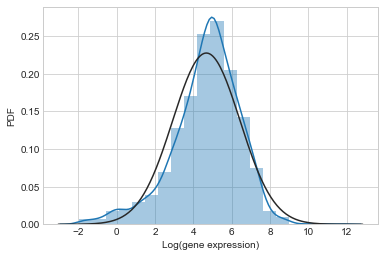

In [20]:
#Baseline Variation plot
%matplotlib inline
#base = sns.load_dataset("baseline2")
plot = sns.distplot(List11,bins =20,fit = norm)
plot.set(xlabel = 'Log(gene expression)',ylabel = 'PDF')

[Text(0,0.5,'PDF'), Text(0.5,0,'Log(gene expression)')]

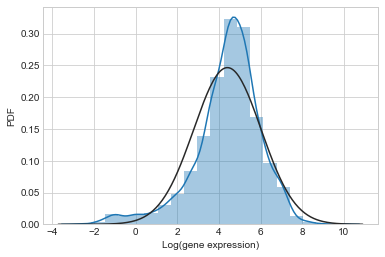

In [21]:
#Metformin Variation plot
%matplotlib inline
#base = sns.load_dataset("baseline2")
plot = sns.distplot(List44,bins = 20,fit = norm)
plot.set(xlabel = 'Log(gene expression)',ylabel = 'PDF')

# Part 3

In [22]:
baseline_modified['Log s_62_M2_N702_S508_RPKM'] = np.log(baseline_modified['s_62_M2_N702_S508_RPKM'])
baseline_modified['Log s_62_M2_N706_S503_RPKM'] = np.log(baseline_modified['s_62_M2_N706_S503_RPKM'])
baseline_modified['Log s_62_M2_N711_S503_RPKM'] = np.log(baseline_modified['s_62_M2_N711_S503_RPKM'])
metformin_modified['Log s_204_M2_N704_S502_RPKM'] = np.log(metformin_modified['s_204_M2_N704_S502_RPKM'])
metformin_modified['Log s_63_M2_N702_S505_RPKM'] = np.log(metformin_modified['s_63_M2_N702_S505_RPKM'])
metformin_modified['Log s_63_M2_N704_S504_RPKM'] = np.log(metformin_modified['s_63_M2_N704_S504_RPKM'])

/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
List1_3 = np.log(baseline_modified['s_62_M2_N702_S508_RPKM']).tolist()
List11_3 = [x for x in List1_3 if x != -np.inf]
List2_3 = np.log(baseline_modified['s_62_M2_N706_S503_RPKM']).tolist()
List22_3 = [x for x in List2_3 if x != -np.inf]
List3_3 = np.log(baseline_modified['s_62_M2_N711_S503_RPKM']).tolist()
List33_3 = [x for x in List3_3 if x != -np.inf]
List11_3.extend(List22_3)
List11_3.extend(List33_3)
List4_3 = np.log(metformin_modified['s_204_M2_N704_S502_RPKM']).tolist()
List44_3 = [x for x in List4_3 if x != -np.inf]
List5_3 = np.log(metformin_modified['s_63_M2_N702_S505_RPKM']).tolist()
List55_3 = [x for x in List5_3 if x != -np.inf]
List6_3 = np.log(metformin_modified['s_63_M2_N704_S504_RPKM']).tolist()
List66_3 = [x for x in List6_3 if x != -np.inf]
List44_3.extend(List55_3)
List44_3.extend(List66_3)

/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


[Text(0,0.5,'PDF'), Text(0.5,0,'Log(gene expression)')]

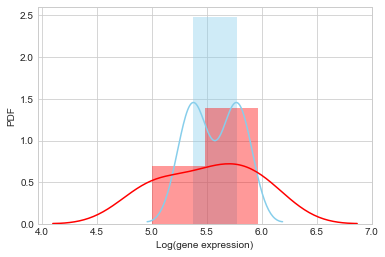

In [24]:
%matplotlib inline
plot = sns.distplot(List11_3,color = 'skyblue',label = 'Baseline')
plot = sns.distplot(List44_3,color = 'red',label = 'Metformin')
plot.set(xlabel = 'Log(gene expression)',ylabel = 'PDF')

# Part 4

In [25]:
names = list(baseline)
names = names[5:]
names2 = list(metformin)
names2 = names2[5:]

In [26]:
baselineT = baseline.transpose()
metforminT = metformin.transpose()
geneNames = set(baseline['GeneID'].tolist()).intersection(set(metformin['GeneID'].tolist()))
print("%d genes common in both dataset" % len(geneNames))
numDifferentlyExpressedGene = 0
candidateGenes = set()
for selectGene in geneNames:
    bIndx = baselineT[1:2:].transpose()['GeneID'].tolist().index(selectGene)
    mIndx = metforminT[1:2:].transpose()['GeneID'].tolist().index(selectGene)
    b = np.log(baselineT[bIndx].iloc[[19,44,80]].astype(float))  
#    b = b[b.values != -np.inf]
    m = np.log(metforminT[mIndx].iloc[[114,15,27]].astype(float))
#    m = m[m.values != -np.inf]
    Vars = {
        "Baseline": b,
        "Metformin": m
    } 
    testResult = stats.ks_2samp(Vars['Baseline'], Vars["Metformin"])
    if testResult[1] < 0.10:
        candidateGenes.add(selectGene)
        numDifferentlyExpressedGene += 1
        print("%d: %s gene is differently expressed in baseline and metformin treated cells" % (numDifferentlyExpressedGene, selectGene))
        print("Test Statistics %f, %g" % (testResult[0], testResult[1]))
 
print('There are 65 genes which differentially expressed at 0.10')

833 genes common in both dataset
1: ACTG1 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
2: NUDT2 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
3: IFITM3 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
4: EEF1B2 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
5: PEBP1 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
6: MRPS28 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
7: RPS16 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
8: TMBIM4 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
9: EIF2S2 gene is differently expressed in 

/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


11: PSMG2 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
12: STMN1 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
13: AP3S1 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
14: SCG5 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
15: GHITM gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
16: RPA2 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
17: PUF60 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
18: RPL15 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
19: NDUFA1 gene is differently expressed in baseline and metformin treated

In [27]:
baselineT = baseline.transpose()
metforminT = metformin.transpose()
geneNames = set(baseline['GeneID'].tolist()).intersection(set(metformin['GeneID'].tolist()))
print("%d genes common in both dataset" % len(geneNames))
numDifferentlyExpressedGene = 0
candidateGenes = set()
for selectGene in geneNames:
    bIndx = baselineT[1:2:].transpose()['GeneID'].tolist().index(selectGene)
    mIndx = metforminT[1:2:].transpose()['GeneID'].tolist().index(selectGene)
    b = np.log(baselineT[bIndx].iloc[[19,44,80]].astype(float))  
#    b = b[b.values != -np.inf]
    m = np.log(metforminT[mIndx].iloc[[114,15,27]].astype(float))
#    m = m[m.values != -np.inf]
    Vars = {
        "Baseline": b,
        "Metformin": m
    } 
    testResult = stats.ks_2samp(Vars['Baseline'], Vars["Metformin"])
    if testResult[1] < 0.05:
        candidateGenes.add(selectGene)
        numDifferentlyExpressedGene += 1
        print("%d: %s gene is differently expressed in baseline and metformin treated cells" % (numDifferentlyExpressedGene, selectGene))
        print("Test Statistics %f, %g" % (testResult[0], testResult[1]))
print('There are 65 genes which differentially expressed at 0.05')
        

        

      

833 genes common in both dataset
1: ACTG1 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
2: NUDT2 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
3: IFITM3 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
4: EEF1B2 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
5: PEBP1 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
6: MRPS28 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
7: RPS16 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
8: TMBIM4 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
9: EIF2S2 gene is differently expressed in 

/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


11: PSMG2 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
12: STMN1 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
13: AP3S1 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
14: SCG5 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
15: GHITM gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
16: RPA2 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
17: PUF60 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
18: RPL15 gene is differently expressed in baseline and metformin treated cells
Test Statistics 1.000000, 0.0326217
19: NDUFA1 gene is differently expressed in baseline and metformin treated

# Task 2

# GMM 

In [28]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Part 1

In [29]:
baseline3 = baseline.copy()
baseline3 = baseline3.drop(['Chr','GeneID','StartCoding','Stop','CodingLength'],axis=1)


In [30]:
metformin3 = metformin.copy()
metformin3 = metformin3.drop(['Chr','GeneID','Start','Stop','CodingLength'],axis=1)


# Part 2

In [31]:
baselineT = baseline3.transpose()
metforminT = metformin3.transpose()

# Part 3

In [32]:
#Application of Gaussian Mixture Model (GMM) clustering algorithm
baseline_gmm = GaussianMixture(n_components= 2, random_state=7).fit(baselineT)
baseline_pred = baseline_gmm.predict(baselineT)
baseline_centers = baseline_gmm.means_


In [33]:
metformin_gmm = GaussianMixture(n_components= 3, random_state=5).fit(metforminT)
metformin_pred = metformin_gmm.predict(metforminT)
metformin_centers = metformin_gmm.means_
print(metformin_centers)

[[   6.96178348  589.41493495   34.14433497 ...,   27.32572769
    86.20000737   16.24578199]
 [   0.          335.42283461   78.29729534 ...,  385.57740589
    80.94641328   96.9990326 ]
 [ 209.91865652  369.79764074    0.         ...,  540.24617903
   274.75961968    0.        ]]


# Part 5

In [34]:
#to find bigger cluster for baseline 
np.count_nonzero(baseline_pred)

#Hence 1st cluster is bigger

17

In [35]:
#to find bigger cluster for baseline 
np.count_nonzero(metformin_pred)
print((metformin_pred))

#Hence 1st cluster > 2nd cluster > 3rd cluster

[0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 2 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


# Part 4

In [36]:
baselineCells = baseline_gmm
baseline_means = baseline.iloc[:, 0:5]  # preserve metadata from first 5 columns
baseline_means["1"] = baselineCells.means_[0]
baseline_means["2"] = baselineCells.means_[1] 


In [37]:
metforminCells = metformin_gmm
metformin_means = metformin.iloc[:, 0:5]  # preserve metadata from first 5 columns
metformin_means["1"] = metforminCells.means_[0]
metformin_means["2"] = metforminCells.means_[1] 
metformin_means["3"] = metforminCells.means_[2] 


# Part 5(contd)

In [38]:
baseline_means.rename(columns={'2': 'B_u','1': 'B_v'}, inplace=True)


In [39]:
metformin_means.rename(columns={'1': 'M_z','2': 'M_y','3': 'M_x'}, inplace=True)


# Part 6

In [40]:
#Filtering Genes to meet the following condition for metformin:
Mean_metformin_means = metformin_means["M_y"].mean() - metformin_means["M_x"].mean()
metformin_upMy_downMx_upMz_DF  = metformin_means[(metformin_means["M_y"] > 32) & (metformin_means["M_x"] < 32) & (metformin_means['M_z'] > 32)]
metformin_upMy_downMx_upMz_DF = metformin_upMy_downMx_upMz_DF.reset_index()
metformin_upMy_downMx_upMz_DF = metformin_upMy_downMx_upMz_DF.drop('index',1)


# Part 7

In [41]:
#Filtering Genes to meet the following condition for baseline:
Mean_baseline_means = baseline_means["B_v"].mean() - baseline_means["B_u"].mean()
baseline_upBv_downBu_DF  = baseline_means[(baseline_means["B_v"] > 32) & (baseline_means["B_u"] < 32)]
baseline_upBv_downBu_DF = baseline_upBv_downBu_DF.reset_index()
baseline_upBv_downBu_DF = baseline_upBv_downBu_DF.drop('index',1)


# Part 8

In [42]:
geneNames = set(metformin_upMy_downMx_upMz_DF['GeneID'].tolist()).intersection(set(baseline_upBv_downBu_DF['GeneID'].tolist()))
print("%d genes common in both dataset" % len(geneNames))
List = []
for select in geneNames:
    List.append(select)
print(List)

35 genes common in both dataset
['ANXA3', 'SNHG1', 'TEX30', 'TIMM23', 'SNORD102', 'CHP', 'MRFAP1', 'AKR1B1', 'ILF2', 'AURKA', 'PSMD14', 'MT1X', 'SNORD100', 'PSMD11', 'CTNNAL1', 'MRPL21', 'DYNLT1', 'SBDS', 'UQCRH', 'DSTN', 'MRPL32', 'SF3B5', 'ACAT2', 'CAPZA2', 'MRPL50', 'SNORD80', 'PSME2', 'FABP5', 'NOP16', 'UBE2C', 'MIR614', 'NUTF2', 'NDUFB5', 'RGS10', 'PFDN2']


In [43]:
index = []
for Gene in List:
    idx = metformin_upMy_downMx_upMz_DF.index[metformin_upMy_downMx_upMz_DF['GeneID'] == Gene].tolist()
    index.append(idx)
print(index)  
result = sum(index, [])
print(result)

[[80], [193], [219], [176], [218], [235], [85], [126], [14], [307], [50], [252], [124], [275], [162], [184], [107], [144], [30], [309], [137], [123], [102], [131], [164], [26], [232], [150], [97], [316], [211], [254], [71], [174], [18]]
[80, 193, 219, 176, 218, 235, 85, 126, 14, 307, 50, 252, 124, 275, 162, 184, 107, 144, 30, 309, 137, 123, 102, 131, 164, 26, 232, 150, 97, 316, 211, 254, 71, 174, 18]


In [44]:
newlyDownregulatedGenes_inMx_fromBu_df = metformin_upMy_downMx_upMz_DF.drop(metformin_upMy_downMx_upMz_DF.index[result])

# Part 9

In [45]:
#Finding common genes between mean baseline and newlyDownregulatedGenes_inMx_fromBu_df
geneNames = set(newlyDownregulatedGenes_inMx_fromBu_df['GeneID'].tolist()).intersection(set(baseline_means['GeneID'].tolist()))
print("%d genes common in both dataset" % len(geneNames))
List2= []
for select in geneNames:
    List2.append(select)
print(List2)

221 genes common in both dataset
['UQCR10', 'GTF3C6', 'GGCT', 'PSMB6', 'NDUFA13', 'MRPL48', 'COPS6', 'CCDC72', 'NDUFA12', 'MT1E', 'COPS5', 'UBE2T', 'GAS5', 'MCM3', 'APRT', 'NQO1', 'RPA2', 'SSB', 'ANLN', 'ECI2', 'NCL', 'C1orf31', 'ATP5A1', 'GSTO1', 'MRPL33', 'EIF3D', 'TUBG1', 'HMGB2', 'TIMP1', 'DDX47', 'NME1', 'TARS', 'CSTB', 'EXOSC9', 'NDUFA1', 'SFTA1P', 'POLR2H', 'CCT6A', 'NDUFB9', 'TMX2', 'CHCHD3', 'PABPC1', 'UBL5', 'POLR1C', 'ERGIC3', 'SNRPD2', 'PARK7', 'RPL17', 'ARPC3', 'YWHAQ', 'RPF2', 'EIF3F', 'C11orf10', 'EIF3L', 'NUP35', 'ARHGDIB', 'CD63', 'CENPW', 'TALDO1', 'CCT4', 'CSNK1A1', 'COPB1', 'EMG1', 'RBX1', 'C14orf2', 'NUDT5', 'MRPL39', 'BTF3', 'FKBP1A', 'TMEM85', 'TAGLN2', 'FARSB', 'GDI2', 'VDAC3', 'EEF1B2', 'SRPRB', 'RRM2', 'COX6B1', 'PLA2G16', 'ROMO1', 'ATP5C1', 'EIF1', 'BRIX1', 'POLR2D', 'RPL7L1', 'COPS3', 'FAM136A', 'RND3', 'EBP', 'ARL6IP1', 'NUDT19', 'CDC20', 'POLR2L', 'POLR2K', 'MRPS33', 'TRMT112', 'SNRPA1', 'REXO2', 'MAD2L1', 'NME7', 'UCA1', 'CHCHD2', 'CNIH4', 'KPNA2', 'VAMP8

In [46]:
#Filtering baseline dataset
baseline_means = baseline_means[baseline_means.GeneID.isin(List2)]

In [47]:
baseline_means = baseline_means.reset_index()
baseline_means = baseline_means.drop('index',1)



In [48]:
#Filtering metformin dataset
metformin_means = metformin_means[metformin_means.GeneID.isin(List2)]

In [49]:
metformin_means = metformin_means.reset_index()
metformin_means = metformin_means.drop('index',1)

# Part 10

In [50]:
#Creating new dataframe for downregulated genes
combined_dataset =  pd.concat([baseline_means['B_v'], baseline_means['B_u'],metformin_means['M_z'],metformin_means['M_y']], axis=1)


# Part 11

In [51]:
#Log transformation of combined dataset:
Log_transform_dataset = np.log(combined_dataset + 1)

In [52]:
#Finding row means and standard deviation
Log_transform_dataset['Mean'] = Log_transform_dataset.mean(axis=1)
Log_transform_dataset['Standard Deviation'] = Log_transform_dataset.std(axis=1)


# Part 12

In [53]:
Log_transform_dataset['M_x'] = np.log(metformin_means['M_x'] + 1)

# Part 13

[Text(0,0.5,'Values'),
 Text(0.5,0,'Clusters'),
 Text(0.5,1,'Visualization of Clusters using GMM')]

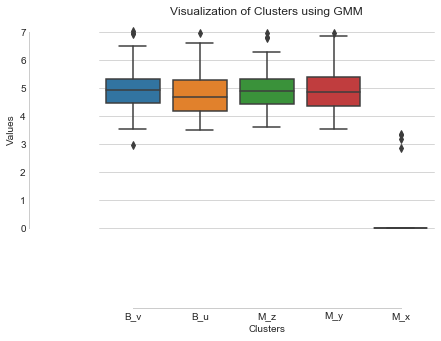

In [54]:
%matplotlib inline
boxplot = sns.boxplot(data = Log_transform_dataset.iloc[:,[0,1,2,3,6]])
sns.despine(offset=70, trim=True)
boxplot.set(xlabel = 'Clusters',ylabel = 'Values',title = 'Visualization of Clusters using GMM')

# K-means clustering :


# Part 14 Silhouette Analysis

In [55]:
#To find the optimum clusters for baseline
def kmeans_clustering(matrix, num_clusters):
    cluster = KMeans(n_clusters=num_clusters, random_state=10).fit(matrix)
    kmeans_pred = cluster.predict(matrix)
    return silhouette_score(matrix, kmeans_pred)

In [56]:
#Silhouette score
N = [i for i in range (2, 40)]
scores_knn_baseline = [kmeans_clustering(baselineT, i) for i in N]

for i in range(0, len(N)):
    print("For n={}, score={:.3f}".format(N[i], scores_knn_baseline[i]))

For n=2, score=0.919
For n=3, score=0.879
For n=4, score=0.873
For n=5, score=0.856
For n=6, score=0.842
For n=7, score=0.829
For n=8, score=0.825
For n=9, score=0.823
For n=10, score=0.198
For n=11, score=0.191
For n=12, score=0.217
For n=13, score=0.208
For n=14, score=0.194
For n=15, score=0.189
For n=16, score=0.188
For n=17, score=0.211
For n=18, score=0.202
For n=19, score=0.197
For n=20, score=0.207
For n=21, score=0.195
For n=22, score=0.193
For n=23, score=0.175
For n=24, score=0.106
For n=25, score=0.106
For n=26, score=0.105
For n=27, score=0.089
For n=28, score=0.077
For n=29, score=0.082
For n=30, score=0.067
For n=31, score=0.087
For n=32, score=0.068
For n=33, score=0.081
For n=34, score=0.065
For n=35, score=0.077
For n=36, score=0.073
For n=37, score=0.068
For n=38, score=0.072
For n=39, score=0.074


In [57]:
# To find the recommended clusters:
recommended_baseline = scores_knn_baseline.index(max(scores_knn_baseline)) + 2
recommended_baseline


2

In [58]:
#To find recommended centers
cluster_recommended_baseline = KMeans(n_clusters=recommended_baseline, random_state=10).fit(baselineT)

# labels
kmeans_pred_recommended_baseline = cluster_recommended_baseline.predict(baselineT)

centers_recommended_baseline = cluster_recommended_baseline.cluster_centers_
print(centers_recommended_baseline)

[[   23.87818033   551.84531078   113.39156564 ...,   172.20188386
   1167.97039732    25.72173204]
 [   59.52051464   314.13809067    76.38346364 ...,    79.82327765
   1197.32821785   312.63676176]]


In [59]:
#To find optimum clusters for metformin
#silhouette score
N = [i for i in range (2, 40)]
scores_knn_metformin = [kmeans_clustering(metforminT, i) for i in N]

for i in range(0, len(N)):
    print("For n={}, score={:.3f}".format(N[i], scores_knn_metformin[i]))

For n=2, score=0.913
For n=3, score=0.893
For n=4, score=0.836
For n=5, score=0.826
For n=6, score=0.820
For n=7, score=0.820
For n=8, score=0.249
For n=9, score=0.244
For n=10, score=0.242
For n=11, score=0.242
For n=12, score=0.244
For n=13, score=0.241
For n=14, score=0.164
For n=15, score=0.165
For n=16, score=0.247
For n=17, score=0.151
For n=18, score=0.184
For n=19, score=0.163
For n=20, score=0.157
For n=21, score=0.153
For n=22, score=0.156
For n=23, score=0.143
For n=24, score=0.153
For n=25, score=0.139
For n=26, score=0.120
For n=27, score=0.129
For n=28, score=0.135
For n=29, score=0.120
For n=30, score=0.135
For n=31, score=0.123
For n=32, score=0.127
For n=33, score=0.118
For n=34, score=0.125
For n=35, score=0.119
For n=36, score=0.099
For n=37, score=0.103
For n=38, score=0.109
For n=39, score=0.100


In [60]:
# To find the recommended clusters:
recommended_metformin = scores_knn_metformin.index(max(scores_knn_metformin)) + 2
recommended_metformin


2

In [61]:
#let us use 3 as recommended clusters
cluster_recommended_metformin = KMeans(n_clusters=3, random_state=10).fit(metforminT)

# labels
kmeans_pred_recommended_metformin = cluster_recommended_metformin.predict(metforminT)

centers_recommended_metformin = cluster_recommended_metformin.cluster_centers_
print(centers_recommended_metformin)

[[  6.96178348e+00   5.89414935e+02   3.41443350e+01 ...,   2.73257277e+01
    8.62000074e+01   1.62457820e+01]
 [  2.09918657e+02   3.69797641e+02   0.00000000e+00 ...,   5.40246179e+02
    2.74759620e+02   0.00000000e+00]
 [  1.77635684e-15   3.35422835e+02   7.82972953e+01 ...,   3.85577406e+02
    8.09464133e+01   9.69990326e+01]]


# Tasks 1-13

In [62]:
#to find bigger cluster for baseline 
print(np.count_nonzero(kmeans_pred_recommended_baseline))
print(len(kmeans_pred_recommended_baseline))
#Hence 1st cluster is bigger

17
169


In [63]:
#to find bigger cluster for baseline 
print(np.count_nonzero(kmeans_pred_recommended_metformin))
print(len(kmeans_pred_recommended_metformin))
#Hence 1st cluster > 3rd cluster > 2nd cluster

16
177


In [64]:
baselineCells = cluster_recommended_baseline
baseline_knn_means = baseline.iloc[:, 0:5]  # preserve metadata from first 5 columns
baseline_knn_means["1"] = baselineCells.cluster_centers_[0]
baseline_knn_means["2"] = baselineCells.cluster_centers_[1] 


In [65]:
metforminCells = cluster_recommended_metformin
metformin_knn_means = metformin.iloc[:, 0:5]  # preserve metadata from first 5 columns
metformin_knn_means["1"] = metforminCells.cluster_centers_[0]
metformin_knn_means["2"] = metforminCells.cluster_centers_[1] 
metformin_knn_means["3"] = metforminCells.cluster_centers_[2] 


In [66]:
baseline_knn_means.rename(columns={'2': 'B_u','1': 'B_v'}, inplace=True)


In [67]:
metformin_knn_means.rename(columns={'1': 'M_z','2': 'M_x','3':'M_y'}, inplace=True)

In [68]:
#Filtering Genes to meet the following condition for metformin:
Mean_metformin_knn_means = metformin_knn_means["M_y"].mean() - metformin_knn_means["M_x"].mean()
metformin_upMy_downMx_upMz_DF  = metformin_knn_means[(metformin_knn_means["M_y"] > 32)  & (metformin_knn_means['M_z'] > 32) & (metformin_knn_means['M_x'] < 32)]
metformin_upMy_downMx_upMz_DF = metformin_upMy_downMx_upMz_DF.reset_index()
metformin_upMy_downMx_upMz_DF = metformin_upMy_downMx_upMz_DF.drop('index',1)


In [69]:
#Filtering Genes to meet the following condition for baseline:
Mean_baseline_knn_means = baseline_knn_means["B_v"].mean() - baseline_knn_means["B_u"].mean()
baseline_upBv_downBu_DF  = baseline_knn_means[(baseline_knn_means["B_v"] > 32) & (baseline_knn_means["B_u"] < 32)]
baseline_upBv_downBu_DF = baseline_upBv_downBu_DF.reset_index()
baseline_upBv_downBu_DF = baseline_upBv_downBu_DF.drop('index',1)


In [70]:
geneNames = set(metformin_upMy_downMx_upMz_DF['GeneID'].tolist()).intersection(set(baseline_upBv_downBu_DF['GeneID'].tolist()))
print("%d genes common in both dataset" % len(geneNames))
List3 = []
for select in geneNames:
    List3.append(select)
print(List3)

35 genes common in both dataset
['ANXA3', 'SNHG1', 'TEX30', 'TIMM23', 'SNORD102', 'CHP', 'MRFAP1', 'AKR1B1', 'ILF2', 'AURKA', 'PSMD14', 'MT1X', 'SNORD100', 'PSMD11', 'CTNNAL1', 'MRPL21', 'DYNLT1', 'SBDS', 'UQCRH', 'DSTN', 'MRPL32', 'SF3B5', 'ACAT2', 'CAPZA2', 'MRPL50', 'SNORD80', 'PSME2', 'FABP5', 'NOP16', 'UBE2C', 'MIR614', 'NUTF2', 'NDUFB5', 'RGS10', 'PFDN2']


In [71]:
index = []
for Gene in List3:
    idx = metformin_upMy_downMx_upMz_DF.index[metformin_upMy_downMx_upMz_DF['GeneID'] == Gene].tolist()
    index.append(idx)
print(index)  
result = sum(index, [])
print(result)

[[80], [193], [219], [176], [218], [235], [85], [126], [14], [307], [50], [252], [124], [275], [162], [184], [107], [144], [30], [309], [137], [123], [102], [131], [164], [26], [232], [150], [97], [316], [211], [254], [71], [174], [18]]
[80, 193, 219, 176, 218, 235, 85, 126, 14, 307, 50, 252, 124, 275, 162, 184, 107, 144, 30, 309, 137, 123, 102, 131, 164, 26, 232, 150, 97, 316, 211, 254, 71, 174, 18]


In [72]:
newlyDownregulatedGenes_inMx_fromBu_df = metformin_upMy_downMx_upMz_DF.drop(metformin_upMy_downMx_upMz_DF.index[result])

In [73]:
#Finding common genes between mean baseline and newlyDownregulatedGenes_inMx_fromBu_df
geneNames = set(newlyDownregulatedGenes_inMx_fromBu_df['GeneID'].tolist()).intersection(set(baseline_knn_means['GeneID'].tolist()))
print("%d genes common in both dataset" % len(geneNames))
List4= []
for select in geneNames:
    List4.append(select)
print(List4)

221 genes common in both dataset
['UQCR10', 'GTF3C6', 'GGCT', 'PSMB6', 'NDUFA13', 'MRPL48', 'COPS6', 'CCDC72', 'NDUFA12', 'MT1E', 'COPS5', 'UBE2T', 'GAS5', 'MCM3', 'APRT', 'NQO1', 'RPA2', 'SSB', 'ANLN', 'ECI2', 'NCL', 'C1orf31', 'ATP5A1', 'GSTO1', 'MRPL33', 'EIF3D', 'TUBG1', 'HMGB2', 'TIMP1', 'DDX47', 'NME1', 'TARS', 'CSTB', 'EXOSC9', 'NDUFA1', 'SFTA1P', 'POLR2H', 'CCT6A', 'NDUFB9', 'TMX2', 'CHCHD3', 'PABPC1', 'UBL5', 'POLR1C', 'ERGIC3', 'SNRPD2', 'PARK7', 'RPL17', 'ARPC3', 'YWHAQ', 'RPF2', 'EIF3F', 'C11orf10', 'EIF3L', 'NUP35', 'ARHGDIB', 'CD63', 'CENPW', 'TALDO1', 'CCT4', 'CSNK1A1', 'COPB1', 'EMG1', 'RBX1', 'C14orf2', 'NUDT5', 'MRPL39', 'BTF3', 'FKBP1A', 'TMEM85', 'TAGLN2', 'FARSB', 'GDI2', 'VDAC3', 'EEF1B2', 'SRPRB', 'RRM2', 'COX6B1', 'PLA2G16', 'ROMO1', 'ATP5C1', 'EIF1', 'BRIX1', 'POLR2D', 'RPL7L1', 'COPS3', 'FAM136A', 'RND3', 'EBP', 'ARL6IP1', 'NUDT19', 'CDC20', 'POLR2L', 'POLR2K', 'MRPS33', 'TRMT112', 'SNRPA1', 'REXO2', 'MAD2L1', 'NME7', 'UCA1', 'CHCHD2', 'CNIH4', 'KPNA2', 'VAMP8

In [74]:
#Filtering baseline dataset
baseline_knn_means = baseline_knn_means[baseline_knn_means.GeneID.isin(List4)]

In [75]:
baseline_knn_means = baseline_knn_means.reset_index()
baseline_knn_means = baseline_knn_means.drop('index',1)


In [76]:
#Filtering metformin dataset
metformin_knn_means = metformin_knn_means[metformin_knn_means.GeneID.isin(List4)]

In [77]:
metformin_knn_means = metformin_knn_means.reset_index()
metformin_knn_means = metformin_knn_means.drop('index',1)

In [78]:
#Creating new dataframe for downregulated genes
combined_dataset_knn =  pd.concat([baseline_knn_means['B_v'], baseline_knn_means['B_u'],metformin_knn_means['M_z'],metformin_knn_means['M_y']], axis=1)


In [79]:
#Log transformation of combined dataset:
Log_transform_knn_dataset = np.log(combined_dataset_knn + 1)

In [80]:
#Finding row means and standard deviation
Log_transform_knn_dataset['Mean'] = Log_transform_knn_dataset.mean(axis=1)
Log_transform_knn_dataset['Standard Deviation'] = Log_transform_knn_dataset.std(axis=1)

In [81]:
Log_transform_knn_dataset['M_x'] = np.log(metformin_knn_means['M_x'] + 1)

[Text(0,0.5,'Values'),
 Text(0.5,0,'Clusters'),
 Text(0.5,1,'Visualization of Clusters using Knn')]

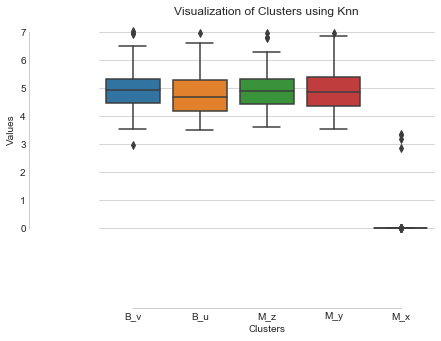

In [82]:
%matplotlib inline
boxplot = sns.boxplot(data = Log_transform_knn_dataset.iloc[:,[0,1,2,3,6]])
sns.despine(offset=70, trim=True)
boxplot.set(xlabel = 'Clusters',ylabel = 'Values',title = 'Visualization of Clusters using Knn')

Thus we are able to obtain same results obtained with GMM using k = 3. 

# Task 3 PCA 

In [83]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [84]:
mat_baseline = baseline3
classes_baseline = baseline_pred 
mat_metformin = metformin3
classes_metformin = metformin_pred

# A Summary of the PCA Approach
* Standardize the data.
* Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
* Sort eigenvalues in descending order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace ($k \leq d$).
* Construct the projection matrix $W$ from the selected $k$ eigenvectors.
* Transform the original dataset $X$ via $W$ to obtain a $k$-dimensional feature subspace $Y$.

In [85]:
#Preprocessing:
scaler = StandardScaler()
Baseline_matrix = scaler.fit_transform(mat_baseline)
metformin_matrix = scaler.fit_transform(mat_metformin)
print(Baseline_matrix[0])
print(metformin_matrix[0])

[-0.45069329 -0.09394173 -0.50937232 -0.45171751 -0.41261048 -0.23214485
 -0.31834554 -0.42005553 -0.50806356 -0.36772162 -0.44812195 -0.44946624
 -0.41931028 -0.41959067 -0.4157606  -0.50992439 -0.45482645 -0.41007
 -0.36702289 -0.46039107 -0.49788063 -0.08465265 -0.447614   -0.38931875
 -0.40464569 -0.39615302 -0.51336925 -0.47691835 -0.43901711 -0.43141198
 -0.37805779 -0.43974645 -0.38344123 -0.4549937  -0.24308142 -0.44205606
 -0.09716528 -0.40129803 -0.38548525 -0.51967429 -0.36256884 -0.49216002
 -0.49572768 -0.44695655 -0.48870738 -0.48648385 -0.55614088 -0.45961721
 -0.08783178 -0.47342001 -0.07882004 -0.51070908 -0.4159426  -0.33654614
 -0.4174283  -0.22277403 -0.52199596 -0.42717357 -0.44803283 -0.44231947
 -0.48724053 -0.3589741  -0.52054783 -0.40081692 -0.33939912 -0.41794193
 -0.26861109 -0.4123018  -0.45852172 -0.43601991 -0.45207056 -0.398731
 -0.42330672 -0.40850343 -0.52571049 -0.10829467 -0.1144253  -0.47605243
 -0.50756071 -0.46637993 -0.34484999 -0.46533734 -0.4813

# EigenDecomposition:
The covariance between two features is calculated as follows:

$$\sigma_{jk} = \frac{1}{n-1} (X - \overline{x})^T (X - \overline{x})$$

where $\overline{x}$ is the mean vector, $\frac{1}{n} \sum_{i=i}^{n} x_i$

In [86]:
Baseline_mean_vector = np.mean(Baseline_matrix,axis = 0)
Baseline_covariance_matrix = (Baseline_matrix - Baseline_mean_vector).dot((Baseline_matrix - Baseline_mean_vector).T)/(Baseline_matrix.shape[0] - 1)
metformin_mean_vector = np.mean(metformin_matrix,axis = 0)
metformin_covariance_matrix = (metformin_matrix - metformin_mean_vector).dot((metformin_matrix - metformin_mean_vector).T)/(metformin_matrix.shape[0] - 1)

In [87]:
print(Baseline_covariance_matrix)
print(metformin_covariance_matrix)

[[ 0.0255878  -0.04863316  0.01282547 ...,  0.00534201 -0.1266311
   0.0248042 ]
 [-0.04863316  0.1341947  -0.02375131 ..., -0.0107729   0.23095847
  -0.04756619]
 [ 0.01282547 -0.02375131  0.00842719 ...,  0.00261622 -0.06462118
   0.01268419]
 ..., 
 [ 0.00534201 -0.0107729   0.00261622 ...,  0.00716274 -0.01855362
   0.00515585]
 [-0.1266311   0.23095847 -0.06462118 ..., -0.01855362  0.73220302
  -0.12472957]
 [ 0.0248042  -0.04756619  0.01268419 ...,  0.00515585 -0.12472957
   0.0246922 ]]
[[ 0.02669471 -0.04996226  0.02292133 ...,  0.02370496  0.01621158
   0.02507152]
 [-0.04996226  0.15372687 -0.04380997 ..., -0.04587095 -0.03229506
  -0.04725276]
 [ 0.02292133 -0.04380997  0.020646   ...,  0.0208321   0.01443848
   0.0220259 ]
 ..., 
 [ 0.02370496 -0.04587095  0.0208321  ...,  0.02182981  0.01482604
   0.02274529]
 [ 0.01621158 -0.03229506  0.01443848 ...,  0.01482604  0.01115183
   0.01566666]
 [ 0.02507152 -0.04725276  0.0220259  ...,  0.02274529  0.01566666
   0.02428469]]


In [88]:
eig_baseline_vals, eig_baseline_vecs = np.linalg.eig(Baseline_covariance_matrix)
eig_metformin_vals, eig_metformin_vecs = np.linalg.eig(metformin_covariance_matrix)

In [89]:
print(eig_baseline_vals)
print(eig_metformin_vals)

[  1.30518534e+02 +0.00000000e+00j   1.74592576e+01 +0.00000000e+00j
   6.01662525e+00 +0.00000000e+00j ...,  -3.83151630e-18 -5.19897088e-18j
  -4.95275596e-18 +3.96914880e-18j  -4.95275596e-18 -3.96914880e-18j]
[  1.38078998e+02 +0.00000000e+00j   1.77476591e+01 +0.00000000e+00j
   5.13941527e+00 +0.00000000e+00j ...,   3.13952614e-18 +7.25056522e-19j
   3.13952614e-18 -7.25056522e-19j   1.74058917e-18 +0.00000000e+00j]


In [90]:
print(eig_baseline_vecs)
print(eig_metformin_vecs)

[[  1.38256380e-02 +0.00000000e+00j   6.08868566e-05 +0.00000000e+00j
   -6.66171449e-04 +0.00000000e+00j ...,   4.21817273e-03 -6.85031346e-03j
   -4.66105571e-04 -7.52910604e-04j  -4.66105571e-04 +7.52910604e-04j]
 [ -2.61353973e-02 +0.00000000e+00j   6.10873689e-03 +0.00000000e+00j
    5.18146043e-03 +0.00000000e+00j ...,  -4.31432335e-05 +8.29773125e-05j
    9.29051675e-06 +7.89802322e-05j   9.29051675e-06 -7.89802322e-05j]
 [  7.12967240e-03 +0.00000000e+00j   8.92980015e-04 +0.00000000e+00j
    2.75934588e-03 +0.00000000e+00j ...,   1.64655160e-04 +4.41778781e-04j
   -3.65591032e-04 -5.33906192e-05j  -3.65591032e-04 +5.33906192e-05j]
 ..., 
 [  2.82612718e-03 +0.00000000e+00j   1.87298793e-03 +0.00000000e+00j
   -1.36143613e-03 +0.00000000e+00j ...,   2.27484182e-02 +1.26247142e-03j
   -2.40822370e-02 -8.98446155e-03j  -2.40822370e-02 +8.98446155e-03j]
 [ -6.97778703e-02 +0.00000000e+00j   8.67801220e-03 +0.00000000e+00j
    1.12251856e-02 +0.00000000e+00j ...,   1.78252704e-03 +

# Step 3 - Selecting Principal Components

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top $k$
eigenvectors.

In [91]:
eig_baseline_pairs = [(np.abs(eig_baseline_vals[i]), eig_baseline_vecs[:,i]) for i in range(len(eig_baseline_vals))]
eig_baseline_pairs.sort(key=lambda x: x[0], reverse=True)
eig_metformin_pairs = [(np.abs(eig_metformin_vals[i]), eig_metformin_vecs[:,i]) for i in range(len(eig_metformin_vals))]
eig_metformin_pairs.sort(key=lambda x: x[0], reverse=True)

In [92]:
print('Eigenvalues in descending order:')
for i in eig_baseline_pairs:
    print(i[0],": ",i[1])

Eigenvalues in descending order:
130.518533862 :  [ 0.01382564+0.j -0.02613540+0.j  0.00712967+0.j ...,  0.00282613+0.j
 -0.06977787+0.j  0.01365809+0.j]
17.4592576105 :  [  6.08868566e-05+0.j   6.10873689e-03+0.j   8.92980015e-04+0.j ...,
   1.87298793e-03+0.j   8.67801220e-03+0.j  -1.07534639e-03+0.j]
6.01662524848 :  [-0.00066617+0.j  0.00518146+0.j  0.00275935+0.j ..., -0.00136144+0.j
  0.01122519+0.j -0.00187359+0.j]
3.46621801948 :  [-0.00713766+0.j  0.04257380+0.j -0.00230063+0.j ..., -0.00577088+0.j
 -0.00602243+0.j -0.00538573+0.j]
1.49944892783 :  [-0.00208745+0.j  0.07985664+0.j  0.00222671+0.j ...,  0.00754042+0.j
 -0.00069288+0.j -0.00067942+0.j]
1.07589708099 :  [ 0.00199542+0.j -0.05546976+0.j -0.00961335+0.j ..., -0.00607192+0.j
 -0.01445911+0.j  0.00066359+0.j]
0.831068926194 :  [-0.00153955+0.j -0.02807488+0.j -0.00244600+0.j ...,  0.03453307+0.j
  0.05239743+0.j -0.00019383+0.j]
0.615501052323 :  [ -1.53353652e-03+0.j   8.87356935e-02+0.j  -1.49504688e-03+0.j ...,
  

0.0284248485922 :  [ 0.00182764+0.j -0.00877701+0.j -0.01712752+0.j ...,  0.00218754+0.j
  0.02164396+0.j  0.00225545+0.j]
0.0276617570801 :  [ 0.00711833+0.j -0.07348191+0.j -0.00172850+0.j ...,  0.04013262+0.j
  0.05234354+0.j -0.00140209+0.j]
0.0270850591356 :  [ 0.00216181+0.j -0.01865080+0.j -0.00279308+0.j ..., -0.02841790+0.j
  0.00714590+0.j -0.00859898+0.j]
0.026952509172 :  [ 0.01506052+0.j  0.02861801+0.j -0.01162431+0.j ...,  0.01890865+0.j
  0.04624571+0.j -0.00908695+0.j]
0.0262545404924 :  [ 0.01823281+0.j -0.04925957+0.j  0.01001160+0.j ...,  0.00967372+0.j
  0.02617006+0.j -0.01028611+0.j]
0.0259127292984 :  [ 0.00473010+0.j -0.02722060+0.j -0.00240063+0.j ..., -0.03268598+0.j
  0.06760591+0.j  0.00240762+0.j]
0.0256940622537 :  [ 0.01880353+0.j  0.06063970+0.j -0.01495393+0.j ...,  0.09373365+0.j
 -0.03361120+0.j  0.00151367+0.j]
0.024898729503 :  [ 0.01761713+0.j  0.10166420+0.j -0.02802972+0.j ..., -0.06187545+0.j
  0.04528176+0.j -0.00419564+0.j]
0.023767371212 :  

 -0.02442578+0.00884527j]
2.24942664145e-16 :  [ 0.00427197+0.00652027j  0.00024392-0.00046182j -0.00048115-0.00376939j
 ...,  0.02198223+0.00288025j -0.00413423-0.00636876j
  0.05312582-0.00036406j]
2.24942664145e-16 :  [ 0.00427197-0.00652027j  0.00024392+0.00046182j -0.00048115+0.00376939j
 ...,  0.02198223-0.00288025j -0.00413423+0.00636876j
  0.05312582+0.00036406j]
2.24202880572e-16 :  [  1.06502144e-03-0.00220301j  -9.88192871e-05+0.00016896j
   1.00061761e-03+0.00099609j ...,   1.22199441e-02+0.0056075j
  -1.13696159e-02-0.00028883j   2.37189584e-03+0.00851434j]
2.24202880572e-16 :  [  1.06502144e-03+0.00220301j  -9.88192871e-05-0.00016896j
   1.00061761e-03-0.00099609j ...,   1.22199441e-02-0.0056075j
  -1.13696159e-02+0.00028883j   2.37189584e-03-0.00851434j]
2.24063021998e-16 :  [ 0.01097414+0.j  0.00010098+0.j -0.00031322+0.j ..., -0.01248811+0.j
 -0.00780323+0.j  0.00629441+0.j]
2.23065291146e-16 :  [ 0.01250723 -1.04257257e-02j  0.00059028 +5.75197782e-05j
  0.00065662 -5

 -0.02092458+0.01379947j]
7.39246682983e-17 :  [-0.01805202-0.00387689j  0.00037376-0.00032454j -0.00081347+0.00114045j
 ..., -0.01657434+0.00819388j -0.00193213+0.00532476j
 -0.01097086+0.05771218j]
7.39246682983e-17 :  [-0.01805202+0.00387689j  0.00037376+0.00032454j -0.00081347-0.00114045j
 ..., -0.01657434-0.00819388j -0.00193213-0.00532476j
 -0.01097086-0.05771218j]
7.27186924828e-17 :  [ 0.01630830-0.0089149j  -0.00026261+0.00034116j  0.00045087+0.00057393j
 ..., -0.02737337+0.01684184j  0.00219814+0.00480217j
  0.07104786+0.00757566j]
7.27186924828e-17 :  [ 0.01630830+0.0089149j  -0.00026261-0.00034116j  0.00045087-0.00057393j
 ..., -0.02737337-0.01684184j  0.00219814-0.00480217j
  0.07104786-0.00757566j]
7.26000516802e-17 :  [  2.59952907e-03+0.0014353j   -1.40412404e-05+0.00022661j
  -7.86241917e-04-0.00101062j ...,  -5.46393536e-04-0.00392009j
  -5.95579840e-04-0.00270922j  -4.11658128e-02-0.00231712j]
7.26000516802e-17 :  [  2.59952907e-03-0.0014353j   -1.40412404e-05-0.0002

In [93]:
print('Eigenvalues in descending order:')
for i in eig_metformin_pairs:
    print(i[0],": ",i[1])

Eigenvalues in descending order:
138.078997649 :  [ 0.01365516+0.j -0.02533572+0.j  0.01192866+0.j ...,  0.01236464+0.j
  0.00849568+0.j  0.01308019+0.j]
17.7476590517 :  [ 0.00024711+0.j  0.00578735+0.j  0.00050694+0.j ..., -0.00136934+0.j
  0.00066644+0.j  0.00031889+0.j]
5.13941527407 :  [ 0.00775336+0.j -0.03363690+0.j  0.00849371+0.j ...,  0.00792645+0.j
  0.00486400+0.j  0.00807569+0.j]
3.08904382997 :  [ 0.00272097+0.j -0.01129600+0.j  0.00459833+0.j ...,  0.00484614+0.j
  0.00515470+0.j  0.00538778+0.j]
2.09802069583 :  [ 0.00442754+0.j -0.06215268+0.j  0.00389724+0.j ...,  0.00273711+0.j
 -0.00193100+0.j  0.00282399+0.j]
1.7317560784 :  [-0.00096301+0.j  0.04487553+0.j  0.00545880+0.j ..., -0.00040170+0.j
  0.00556839+0.j  0.00175493+0.j]
1.07304931636 :  [-0.00416407+0.j -0.11437125+0.j -0.00102732+0.j ...,  0.00092068+0.j
  0.00619163+0.j -0.00382302+0.j]
0.929204167319 :  [  3.12843380e-03+0.j  -5.11585883e-02+0.j   4.31706009e-03+0.j ...,
   1.56549728e-03+0.j   9.62955354

0.00935868186642 :  [ 0.01022355+0.j  0.00443942+0.j -0.00882155+0.j ..., -0.01238438+0.j
 -0.00751619+0.j -0.00288083+0.j]
0.00927953355963 :  [ 0.00256032+0.j -0.00591958+0.j -0.00364969+0.j ...,  0.00479002+0.j
 -0.00739038+0.j -0.01087775+0.j]
0.00923321475049 :  [-0.00942304+0.j -0.04226833+0.j -0.01528432+0.j ...,  0.00836800+0.j
 -0.01868933+0.j  0.00444087+0.j]
0.0089549423769 :  [-0.00461358+0.j  0.07595078+0.j -0.02837956+0.j ..., -0.00332915+0.j
  0.03520435+0.j  0.00083740+0.j]
0.00877844703726 :  [ 0.00116332+0.j  0.00097632+0.j  0.01351632+0.j ...,  0.00780955+0.j
 -0.02607945+0.j -0.01683875+0.j]
0.00864996711693 :  [ 0.00925962+0.j -0.06415207+0.j  0.00528130+0.j ...,  0.00083098+0.j
 -0.00466979+0.j  0.01490774+0.j]
0.0084967108229 :  [-0.00187223+0.j -0.05978761+0.j -0.02630901+0.j ..., -0.00691523+0.j
  0.02739100+0.j -0.01357144+0.j]
0.00840057188074 :  [-0.00271375+0.j -0.04272625+0.j  0.02662133+0.j ..., -0.00165553+0.j
 -0.00375884+0.j  0.00986846+0.j]
0.00826021

1.99107922055e-16 :  [  2.52255051e-03+0.01967795j   6.99013907e-05-0.00080472j
  -1.02015085e-03-0.00015587j ...,  -7.20105778e-03-0.02642996j
   2.72363946e-02-0.00370934j  -4.26766623e-02+0.00492202j]
1.99107922055e-16 :  [  2.52255051e-03-0.01967795j   6.99013907e-05+0.00080472j
  -1.02015085e-03+0.00015587j ...,  -7.20105778e-03+0.02642996j
   2.72363946e-02+0.00370934j  -4.26766623e-02-0.00492202j]
1.96095303447e-16 :  [-0.02623878 +1.09452266e-02j  0.00093821 -5.79244451e-05j
 -0.00051735 -1.27482523e-04j ...,  0.06164383 -8.56473664e-03j
  0.00620131 +2.22292131e-02j -0.04161327 -1.31069680e-02j]
1.96095303447e-16 :  [-0.02623878 -1.09452266e-02j  0.00093821 +5.79244451e-05j
 -0.00051735 +1.27482523e-04j ...,  0.06164383 +8.56473664e-03j
  0.00620131 -2.22292131e-02j -0.04161327 +1.31069680e-02j]
1.95983384814e-16 :  [  1.43164845e-03+0.0163648j   -3.38488014e-05+0.00046326j
   3.22306513e-04-0.0003482j  ...,  -3.47560970e-02+0.02051425j
  -5.74712029e-03+0.01206184j  -3.231026

5.44426391726e-17 :  [ 0.00104556-0.0098979j  -0.00022600+0.0003967j  -0.00046919-0.00048867j
 ..., -0.04008319+0.02468011j  0.04800546+0.03035159j
  0.00748812-0.0083951j ]
5.4227535733e-17 :  [-0.00266351 -2.40072781e-03j  0.00028876 +1.89756579e-05j
 -0.00037014 +2.84316259e-04j ..., -0.00344972 +5.66507880e-03j
 -0.02811124 -5.70192386e-02j -0.01100472 +1.83261405e-02j]
5.4227535733e-17 :  [-0.00266351 +2.40072781e-03j  0.00028876 -1.89756579e-05j
 -0.00037014 -2.84316259e-04j ..., -0.00344972 -5.66507880e-03j
 -0.02811124 +5.70192386e-02j -0.01100472 -1.83261405e-02j]
5.38964867536e-17 :  [  8.62888988e-03-0.00146912j   2.20582717e-04-0.00012918j
   8.48048430e-05+0.00051315j ...,   8.42880550e-03+0.03589j
   4.91433739e-04-0.04819383j   8.68676081e-03+0.02631521j]
5.38964867536e-17 :  [  8.62888988e-03+0.00146912j   2.20582717e-04+0.00012918j
   8.48048430e-05-0.00051315j ...,   8.42880550e-03-0.03589j
   4.91433739e-04+0.04819383j   8.68676081e-03-0.02631521j]
5.36109799109e-17 

# Explained Variance
After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [94]:
sum_baseline = sum(eig_baseline_vals)
var_baseline_exp = [(i / sum_baseline)*100 for i in sorted(eig_baseline_vals, reverse=True)]
cum_var_exp_baseline = np.cumsum(var_baseline_exp)
sum_metformin = sum(eig_metformin_vals)
var_metformin_exp = [(i / sum_metformin)*100 for i in sorted(eig_metformin_vals, reverse=True)]
cum_var_exp_metformin = np.cumsum(var_metformin_exp)

In [95]:
len(cum_var_exp_baseline)

1170

/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/matplotlib/transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


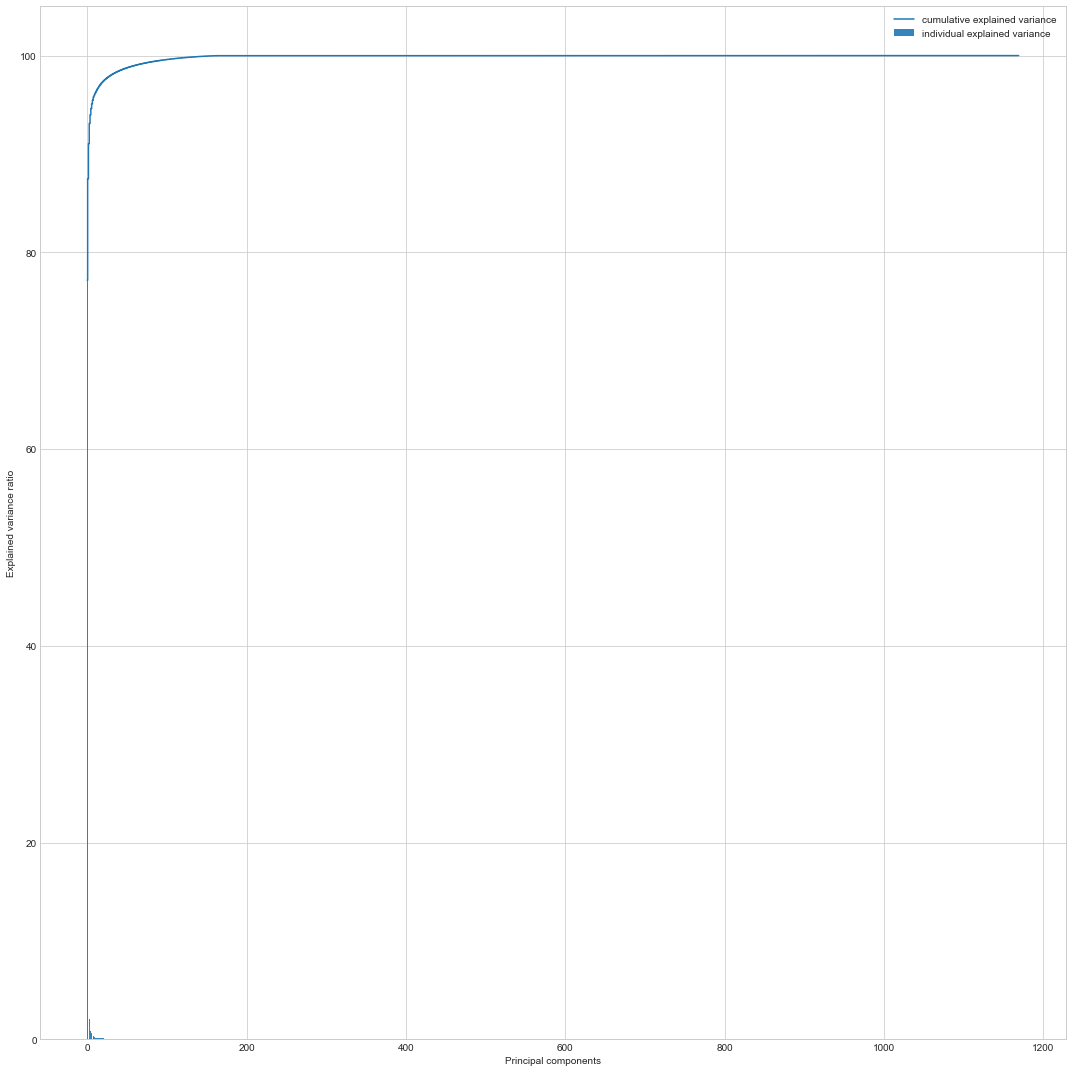

In [96]:
%matplotlib inline
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15,15))

    plt.bar(range(1170),var_baseline_exp,alpha=0.9, align='center',
            label='individual explained variance')
    plt.step(range(1170),cum_var_exp_baseline, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/matplotlib/transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/Users/pradeepkumarthiagu/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


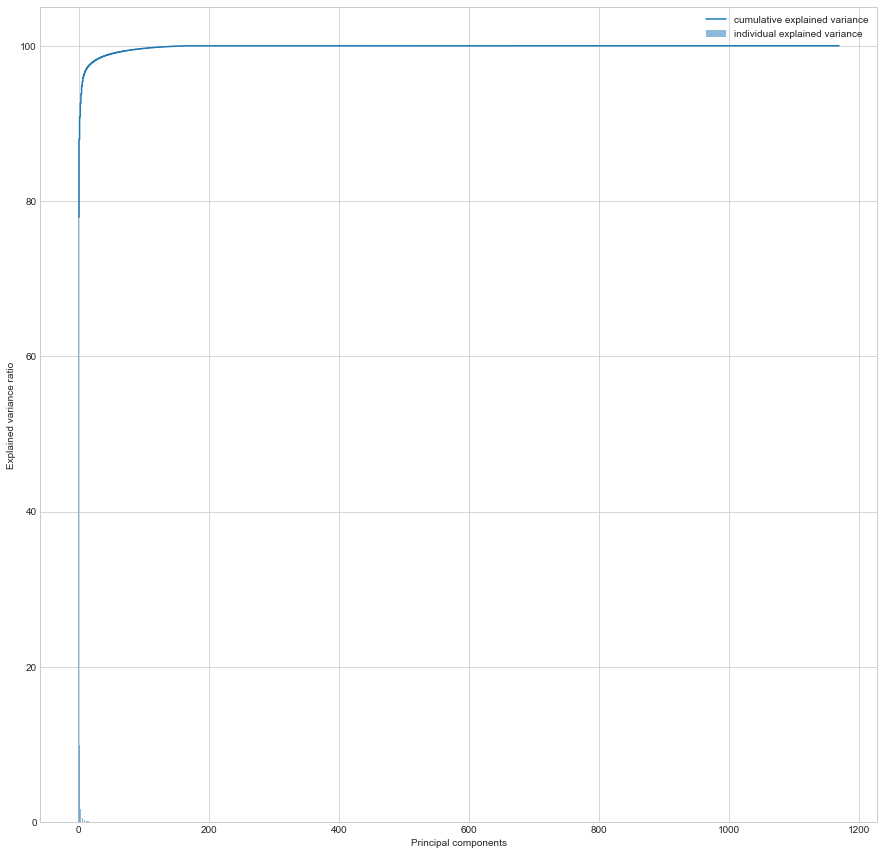

In [97]:
%matplotlib inline
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15,15))

    plt.bar(range(1170),var_metformin_exp,alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(1170),cum_var_exp_metformin, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    
    plt.show()

Hence two principal components are appropriate to explain the variance during analysis

# PCA using 3 components


In [141]:
#Baseline dataset
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca_baseline = sklearnPCA(n_components=3)
baseline_sklearn = sklearn_pca_baseline.fit_transform(baseline3)

PC1b_component = sklearn_pca_baseline.components_[0] 
PC2b_component = sklearn_pca_baseline.components_[1]
PC3b_component = sklearn_pca_baseline.components_[2]

xb = sklearn_pca_baseline.transform(baseline3)[:,0] 
yb = sklearn_pca_baseline.transform(baseline3)[:,1]
zb = sklearn_pca_baseline.transform(baseline3)[:,2]



new_list = []
for item in classes_baseline:
    new_list.append(str(item))
    


final_new_list = []
for item in new_list:
    final_new_list.append(str(item))

print(final_new_list)

new_list2 = []
for item in classes_metformin:
    new_list2.append(str(item))




['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0']


In [1]:
baseline_sklearn[new_list=='0',0]

NameError: name 'baseline_sklearn' is not defined

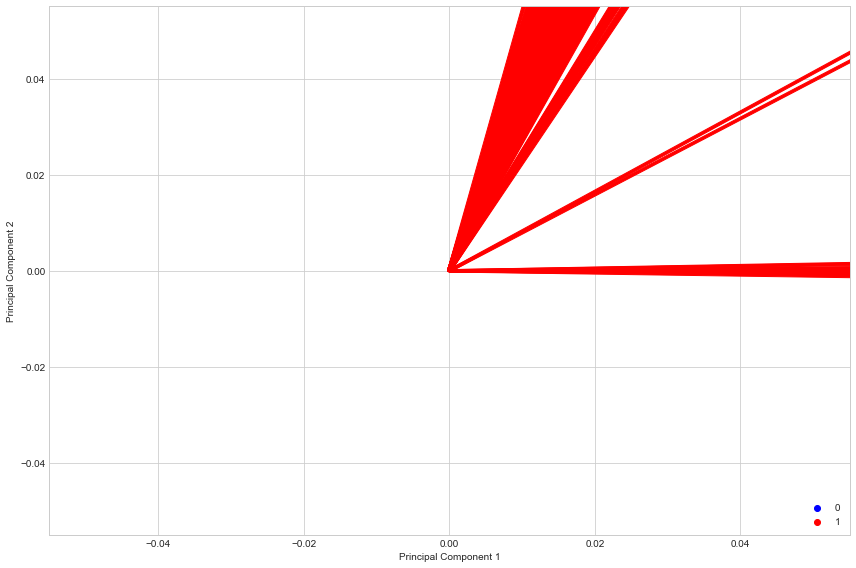

In [142]:
%matplotlib inline
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for lab, col in zip(('0','1'),('blue', 'red')):
        plt.scatter(baseline_sklearn[new_list==lab,0],
                    baseline_sklearn[new_list==lab,1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    
    
    for i in range(len(PC1b_component)):
# arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, PC1b_component[i]*max(xb), PC2b_component[i]*max(yb),
              color='r', width=0.0005, head_width=0.0025)
    
    
    plt.show()
    

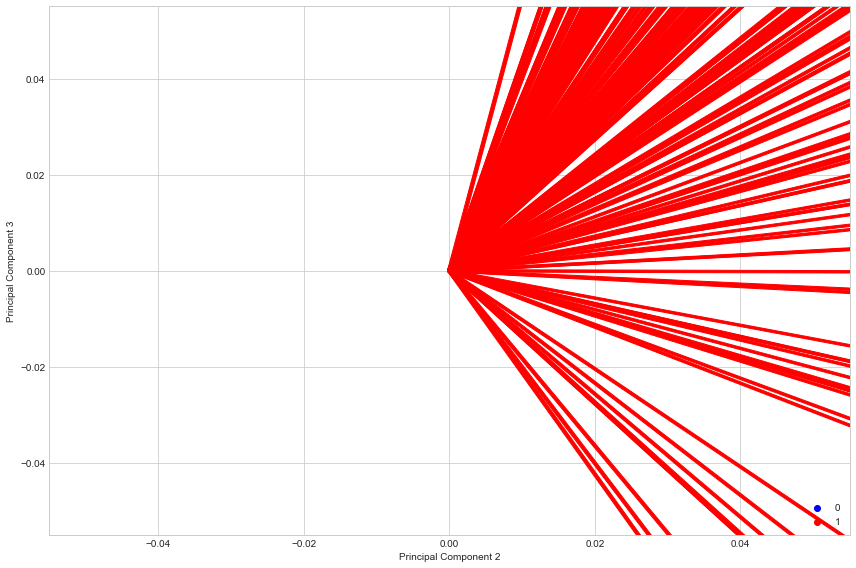

In [143]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for lab, col in zip(('0','1'),('blue', 'red')):
        plt.scatter(baseline_sklearn[new_list==lab,0],
                    baseline_sklearn[new_list==lab,1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 2')
    plt.ylabel('Principal Component 3')
    plt.legend(loc='lower right')
    plt.tight_layout()
    
    
    for i in range(len(PC1b_component)):
# arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, PC1b_component[i]*max(yb), PC3b_component[i]*max(zb),
              color='r', width=0.0005, head_width=0.0025)
    
    
    plt.show()

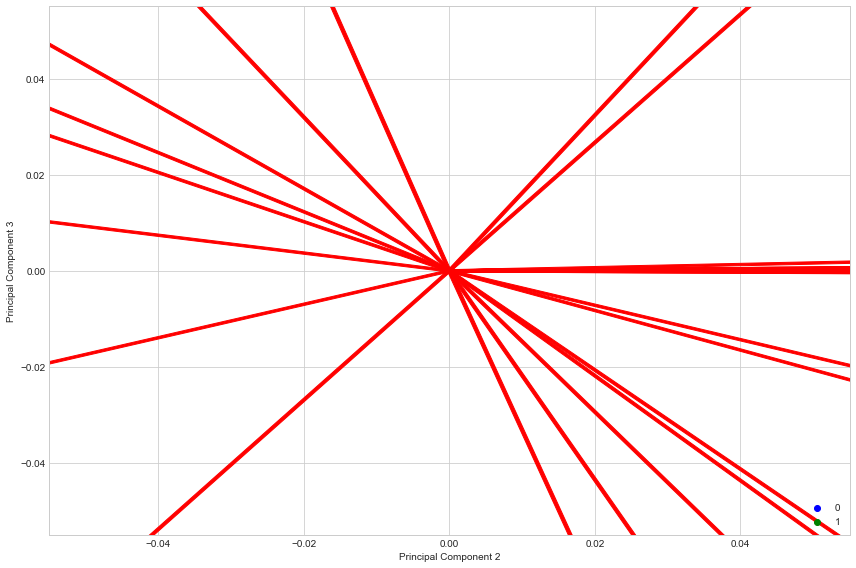

In [101]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for lab, col in zip(('0','1'),('blue','green')):
        plt.scatter(baseline_sklearn[new_list==lab,0],
                    baseline_sklearn[new_list==lab,1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 2')
    plt.ylabel('Principal Component 3')
    plt.legend(loc='lower right')
    plt.tight_layout()
    
    
    for i in range(len(PC2b_component)):
# arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, PC2b_component[i]*max(xb), PC3b_component[i]*max(zb),
              color='r', width=0.0005, head_width=0.0025)
    
    
    plt.show()

In [102]:
#Metformin dataset
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca_metformin = sklearnPCA(n_components=3)
metformin_sklearn = sklearn_pca_metformin.fit_transform(metformin3)

PC1m_component = sklearn_pca_metformin.components_[0] 
PC2m_component = sklearn_pca_metformin.components_[1]
PC3m_component = sklearn_pca_metformin.components_[2]

xm = sklearn_pca_metformin.transform(metformin3)[:,0] 
ym = sklearn_pca_metformin.transform(metformin3)[:,1]
zm = sklearn_pca_metformin.transform(metformin3)[:,2]

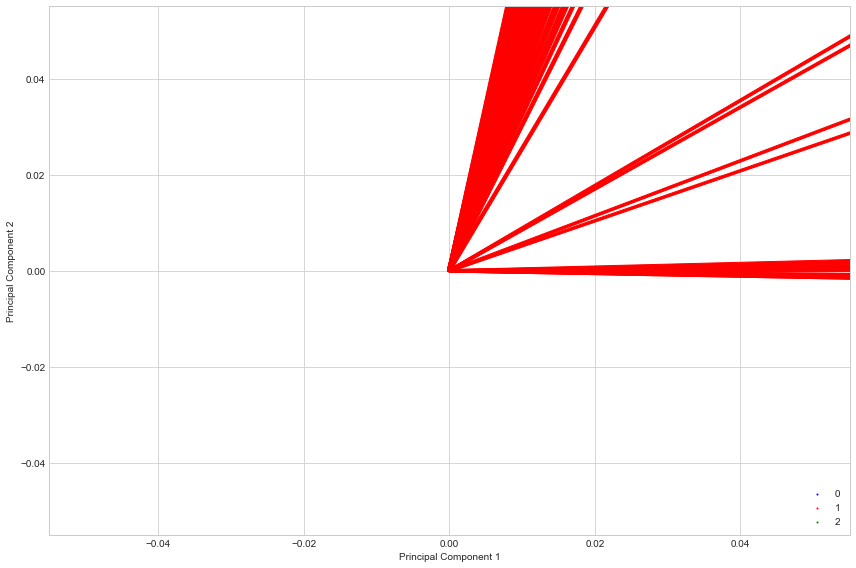

In [103]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for lab, col in zip(('0','1','2'),
                        ('blue', 'red','green')):
        plt.scatter(metformin_sklearn[new_list2==lab, 0],
                    metformin_sklearn[new_list2==lab, 1],
                    metformin_sklearn[new_list2==lab, 2],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    
    for i in range(len(PC1m_component)):
# arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, PC1m_component[i]*max(xm), PC2m_component[i]*max(ym),
              color='r', width=0.0005, head_width=0.0025)
    
    
    plt.show()

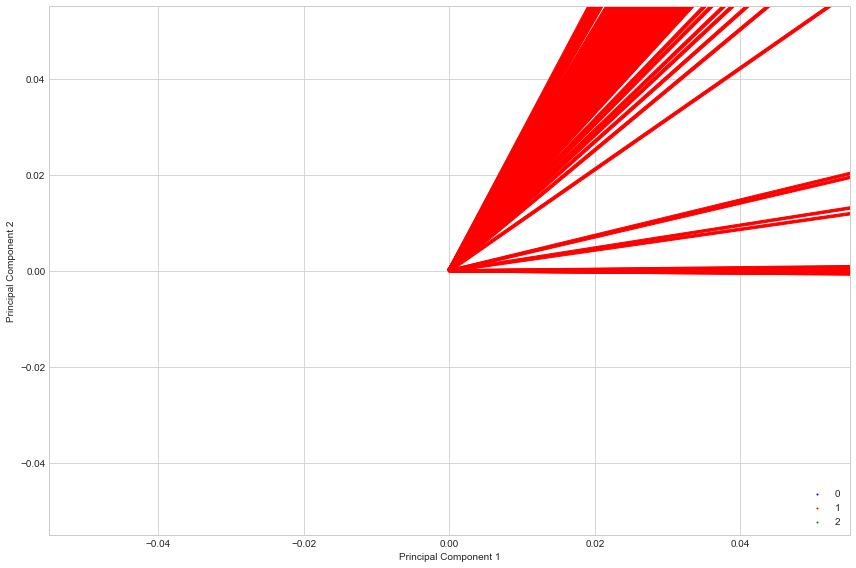

In [104]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for lab, col in zip(('0','1','2'),
                        ('blue', 'red','green')):
        plt.scatter(metformin_sklearn[new_list2==lab, 0],
                    metformin_sklearn[new_list2==lab, 1],
                    metformin_sklearn[new_list2==lab, 2],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    
    for i in range(len(PC1m_component)):
# arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, PC1m_component[i]*max(xm), PC2m_component[i]*max(zm),
              color='r', width=0.0005, head_width=0.0025)
    
    
    plt.show()

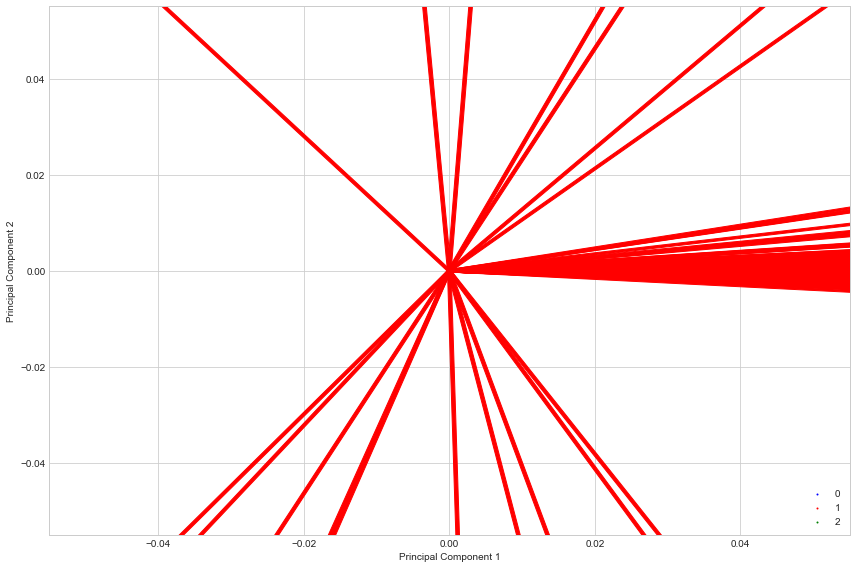

In [105]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    for lab, col in zip(('0','1','2'),
                        ('blue', 'red','green')):
        plt.scatter(metformin_sklearn[new_list2==lab, 0],
                    metformin_sklearn[new_list2==lab, 1],
                    metformin_sklearn[new_list2==lab, 2],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    
    for i in range(len(PC2m_component)):
# arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, PC2m_component[i]*max(ym), PC3m_component[i]*max(zm),
              color='r', width=0.0005, head_width=0.0025)
    
    
    plt.show()